In [ ]:
# ..... get files for batch-correction estimation ..... #

In [2]:
library(Seurat)
library(dplyr)

In [34]:
currstage = 'stage16'

# get UMAPs for before-integration batch-mixing in clusters
immune.combined.sct = readRDS(paste0(currstage, '_integrated_cca.rds'))

# get all counts
s1 = CreateSeuratObject(counts = immune.combined.sct@assays$RNA@counts,                                                
                        meta.data = immune.combined.sct@meta.data)

# normalize and identify variable features for each dataset independently
s1 <- NormalizeData(s1)
s1 <- FindVariableFeatures(s1, selection.method = "vst", nfeatures = 3000)
s1 <- ScaleData(s1, verbose = FALSE)

Normalizing layer: counts

Finding variable features for layer counts



In [35]:
# run pca, umap
s1 <- RunPCA(s1, verbose = FALSE)
s1 <- RunUMAP(s1, reduction = "pca", dims = 1:30)

# cluster integrated data
s1 <- FindNeighbors(s1, reduction = "pca", dims = 1:30)
s1 <- FindClusters(s1, resolution = 0.5)

07:41:36 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

07:41:36 Read 28590 rows and found 30 numeric columns

07:41:36 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

07:41:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:41:40 Writing NN index file to temp file /tmp/RtmpTQfefD/filefa1e050b2a9f5

07:41:40 Searching Annoy index using 1 thread, search_k = 3000

07:41:49 Annoy recall = 100%

07:41:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:41:52 Initializing from normalized Laplacian +

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 28590
Number of edges: 1086898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9285
Number of communities: 20
Elapsed time: 4 seconds


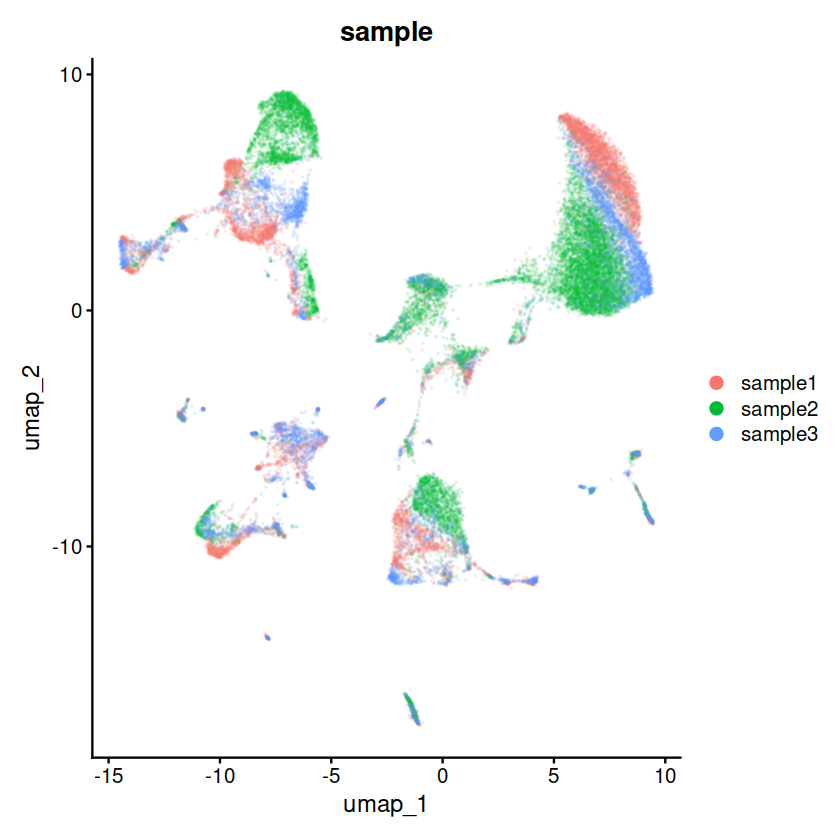

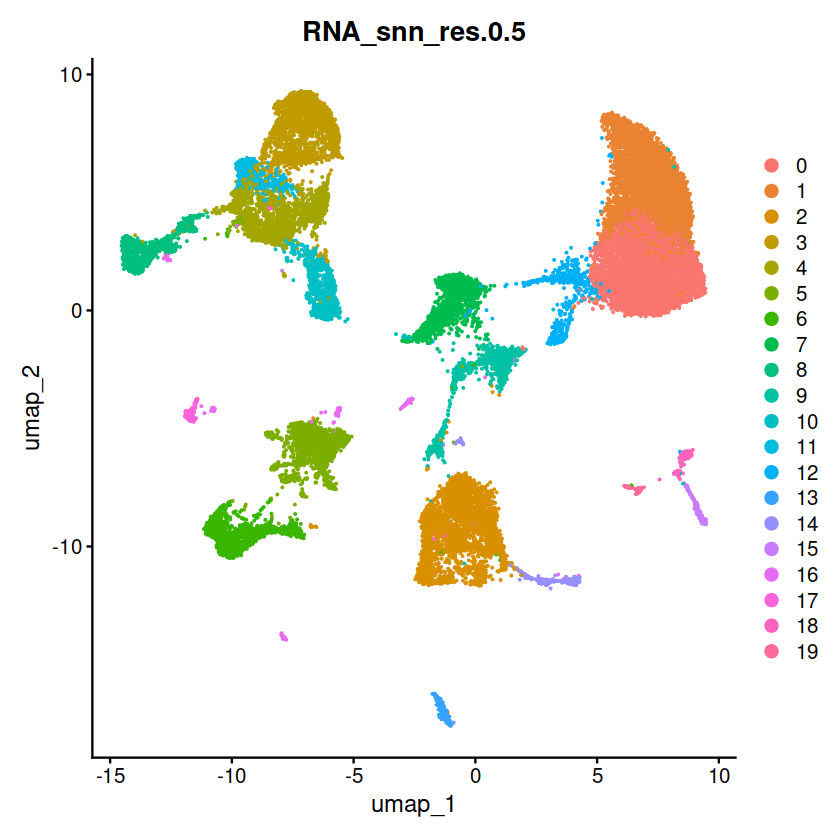

In [36]:
# plot integrated umap
tplot <- DimPlot(s1, reduction = "umap", group.by = "sample")
tplot[[1]]$layers[[1]]$aes_params$alpha =  .1
tplot

# plot integrated umap
DimPlot(s1, reduction = "umap", group.by = "RNA_snn_res.0.5")

In [37]:
dfnew = data.frame(stage = currstage, sample = s1$sample, before_cls = s1$RNA_snn_res.0.5, 
                   before_pc1 = s1@reductions$pca@cell.embeddings[,1],
                   before_pc2 = s1@reductions$pca@cell.embeddings[,2],
                   before_umap1 = s1@reductions$umap@cell.embeddings[,1],
                   before_umap2 = s1@reductions$umap@cell.embeddings[,2],
                   cca_cls = s1$integrated_snn_res.0.5,
                   cca_pc1 = immune.combined.sct@reductions$pca@cell.embeddings[,1],
                   cca_pc2 = immune.combined.sct@reductions$pca@cell.embeddings[,2],
                   cca_umap1 = immune.combined.sct@reductions$umap@cell.embeddings[,1],
                   cca_umap2 = immune.combined.sct@reductions$umap@cell.embeddings[,2])
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage16_sample1_AAACCCACAGCTGTCG-1 stage16 sample1 9            9.586722
stage16_sample1_AAACCCACATGTGACT-1 stage16 sample1 6          -18.712889
stage16_sample1_AAACCCACATTGAGCT-1 stage16 sample1 1            9.928594
                                   before_pc2  before_umap1 before_umap2
stage16_sample1_AAACCCACAGCTGTCG-1  -0.9640071  1.892485    -1.834357   
stage16_sample1_AAACCCACATGTGACT-1 -18.3253863 -7.470312    -9.263928   
stage16_sample1_AAACCCACATTGAGCT-1   1.5654193  8.104568     6.214425   
                                   cca_cls cca_pc1   cca_pc2   cca_umap1
stage16_sample1_AAACCCACAGCTGTCG-1 0       -14.99809 -3.631531 -5.646038
stage16_sample1_AAACCCACATGTGACT-1 8         2.28871 21.246323 10.005135
stage16_sample1_AAACCCACATTGAGCT-1 4       -10.73426 -5.907479 -7.409575
                                   cca_umap2
stage16_sample1_AAACCCACAGCTGTCG-1 -3.719806
stage16_sample1_AAACCCACATGTGACT-1 -7.972849
stage16_sample1_AAACCCACATTGAGCT-1  3.403556

In [38]:
# get data from rpca
s2 = readRDS(paste0(currstage, '_integrated_rpca.rds'))

dfnew$rpca_cls = s2$integrated_snn_res.0.5
dfnew$rpca_pc1 = s2@reductions$pca@cell.embeddings[,1]
dfnew$rpca_pc2 = s2@reductions$pca@cell.embeddings[,2]
dfnew$rpca_umap1 = s2@reductions$umap@cell.embeddings[,1]
dfnew$rpca_umap2 = s2@reductions$umap@cell.embeddings[,2]
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage16_sample1_AAACCCACAGCTGTCG-1 stage16 sample1 9            9.586722
stage16_sample1_AAACCCACATGTGACT-1 stage16 sample1 6          -18.712889
stage16_sample1_AAACCCACATTGAGCT-1 stage16 sample1 1            9.928594
                                   before_pc2  before_umap1 before_umap2
stage16_sample1_AAACCCACAGCTGTCG-1  -0.9640071  1.892485    -1.834357   
stage16_sample1_AAACCCACATGTGACT-1 -18.3253863 -7.470312    -9.263928   
stage16_sample1_AAACCCACATTGAGCT-1   1.5654193  8.104568     6.214425   
                                   cca_cls cca_pc1   cca_pc2   cca_umap1
stage16_sample1_AAACCCACAGCTGTCG-1 0       -14.99809 -3.631531 -5.646038
stage16_sample1_AAACCCACATGTGACT-1 8         2.28871 21.246323 10.005135
stage16_sample1_AAACCCACATTGAGCT-1 4       -10.73426 -5.907479 -7.409575
                                   cca_umap2 rpca_cls rpca_pc1  rpca_pc2  
stage16_sample1_AAACCCACAGCTGTCG-1 -3.719806 1        -16.70318   3.834282
stage16_sample1_AAACCCACATGTGACT-1 -7.972849 7          1.87448 -22.886940
stage16_sample1_AAACCCACATTGAGCT-1  3.403556 3        -11.56307   6.439355
                                   rpca_umap1 rpca_umap2
stage16_sample1_AAACCCACAGCTGTCG-1  3.255303  6.1502145 
stage16_sample1_AAACCCACATGTGACT-1 -7.093441  6.7912372 
stage16_sample1_AAACCCACATTGAGCT-1  6.526479  0.5465825

In [39]:
# data from fastMNN
load(paste0(currstage, '_fastMNN.Rdata'))

pcs = reducedDims(combined)[['corrected']]
tsnes = reducedDims(combined)[['TSNE']]
dfnew$mnn_pc1 = unlist(pcs[,1])
dfnew$mnn_pc2 = unlist(pcs[,2])
dfnew$mnn_tsne1 = unlist(tsnes[,1])
dfnew$mnn_tsne2 = unlist(tsnes[,2])
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage16_sample1_AAACCCACAGCTGTCG-1 stage16 sample1 9            9.586722
stage16_sample1_AAACCCACATGTGACT-1 stage16 sample1 6          -18.712889
stage16_sample1_AAACCCACATTGAGCT-1 stage16 sample1 1            9.928594
                                   before_pc2  before_umap1 before_umap2
stage16_sample1_AAACCCACAGCTGTCG-1  -0.9640071  1.892485    -1.834357   
stage16_sample1_AAACCCACATGTGACT-1 -18.3253863 -7.470312    -9.263928   
stage16_sample1_AAACCCACATTGAGCT-1   1.5654193  8.104568     6.214425   
                                   cca_cls cca_pc1   cca_pc2   ⋯ cca_umap2
stage16_sample1_AAACCCACAGCTGTCG-1 0       -14.99809 -3.631531 ⋯ -3.719806
stage16_sample1_AAACCCACATGTGACT-1 8         2.28871 21.246323 ⋯ -7.972849
stage16_sample1_AAACCCACATTGAGCT-1 4       -10.73426 -5.907479 ⋯  3.403556
                                   rpca_cls rpca_pc1  rpca_pc2   rpca_umap1
stage16_sample1_AAACCCACAGCTGTCG-1 1        -16.70318   3.834282  3.255303 
stage16_sample1_AAACCCACATGTGACT-1 7          1.87448 -22.886940 -7.093441 
stage16_sample1_AAACCCACATTGAGCT-1 3        -11.56307   6.439355  6.526479 
                                   rpca_umap2 mnn_pc1    mnn_pc2    mnn_tsne1
stage16_sample1_AAACCCACAGCTGTCG-1 6.1502145  -0.2042987 0.10481491 -2.884762
stage16_sample1_AAACCCACATGTGACT-1 6.7912372   0.3182322 0.21390255 24.782672
stage16_sample1_AAACCCACATTGAGCT-1 0.5465825  -0.2242751 0.04251406 -3.241274
                                   mnn_tsne2
stage16_sample1_AAACCCACAGCTGTCG-1 21.664176
stage16_sample1_AAACCCACATGTGACT-1  8.980224
stage16_sample1_AAACCCACATTGAGCT-1 10.139315

In [40]:
# data from scanorama
t1 = read.delim(paste0(currstage, '_scanorama_pca_hvg.csv'), sep = ',', header = F)
t2 = read.delim(paste0(currstage, '_scanorama_umap_hvg.csv'), sep = ',', header = F)
t3 = read.delim(paste0(currstage, '_scanorama_clusters_hvg.csv'), sep = ',', header = T)
dfnew$scanorama_cls = t3$clusters
dfnew$scanorama_pc1 = t1[,1]
dfnew$scanorama_pc2 = t1[,2]
dfnew$scanorama_umap1 = t2[,1]
dfnew$scanorama_umap2 = t2[,2]
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage16_sample1_AAACCCACAGCTGTCG-1 stage16 sample1 9            9.586722
stage16_sample1_AAACCCACATGTGACT-1 stage16 sample1 6          -18.712889
stage16_sample1_AAACCCACATTGAGCT-1 stage16 sample1 1            9.928594
                                   before_pc2  before_umap1 before_umap2
stage16_sample1_AAACCCACAGCTGTCG-1  -0.9640071  1.892485    -1.834357   
stage16_sample1_AAACCCACATGTGACT-1 -18.3253863 -7.470312    -9.263928   
stage16_sample1_AAACCCACATTGAGCT-1   1.5654193  8.104568     6.214425   
                                   cca_cls cca_pc1   cca_pc2   ⋯ rpca_umap2
stage16_sample1_AAACCCACAGCTGTCG-1 0       -14.99809 -3.631531 ⋯ 6.1502145 
stage16_sample1_AAACCCACATGTGACT-1 8         2.28871 21.246323 ⋯ 6.7912372 
stage16_sample1_AAACCCACATTGAGCT-1 4       -10.73426 -5.907479 ⋯ 0.5465825 
                                   mnn_pc1    mnn_pc2    mnn_tsne1 mnn_tsne2
stage16_sample1_AAACCCACAGCTGTCG-1 -0.2042987 0.10481491 -2.884762 21.664176
stage16_sample1_AAACCCACATGTGACT-1  0.3182322 0.21390255 24.782672  8.980224
stage16_sample1_AAACCCACATTGAGCT-1 -0.2242751 0.04251406 -3.241274 10.139315
                                   scanorama_cls scanorama_pc1 scanorama_pc2
stage16_sample1_AAACCCACAGCTGTCG-1 0              0.1542853    0.04463826   
stage16_sample1_AAACCCACATGTGACT-1 3             -0.2850473    0.34151003   
stage16_sample1_AAACCCACATTGAGCT-1 0              0.2112396    0.04309630   
                                   scanorama_umap1 scanorama_umap2
stage16_sample1_AAACCCACAGCTGTCG-1 -3.424966       14.436172      
stage16_sample1_AAACCCACATGTGACT-1  5.558142        6.968474      
stage16_sample1_AAACCCACATTGAGCT-1 -6.224540       13.808170

In [41]:
# MetaMarker-based anno from Qiu and KS datasets
tab1 = read.delim(paste0(currstage, '_Qiu_celltypes.csv'), sep = ',')
tab1[1,]
tab2 = read.delim(paste0(currstage, '_Knight-Schrijver_celltypes.csv'), sep = ',')
tab2[1,]

barcode                            class               celltype
1 stage16_sample1_AAACCCACAGCTGTCG-1 Primitive_erythroid NA      
  final_celltype     
1 Primitive_erythroid

barcode                            class          celltype            
1 stage16_sample1_AAACCCACAGCTGTCG-1 Immature_other Immature_Endothelium
  final_celltype      
1 Immature_Endothelium

In [42]:
dfnew$Qiu_class = tab1$class[match(rownames(dfnew), tab1$barcode)]
dfnew$Qiu_celltype = tab1$final_celltype[match(rownames(dfnew), tab1$barcode)]
dfnew$KS_class = tab2$class[match(rownames(dfnew), tab2$barcode)]
dfnew$KS_celltype = tab2$final_celltype[match(rownames(dfnew), tab2$barcode)]

In [43]:
# save file
write.table(dfnew, file = paste0(currstage, '_batch_corrected_embeddings.csv'), sep = ',', row.names = T,
           col.names = T, quote = F)

In [ ]:
# Seurat to SCE
sc.seurat <- as.Seurat(combined, counts = "counts", data = "logcounts")